In [8]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from src.helper_functions import train_step, test_step, accuracy_fn, run_model
from src.few_shot_learning import set_seed, calculate_accuracy, load_cinic10, plot_confusion_matrix
from src.plots_functions import multiple_runs_with_uncertainty_band
set_seed(213)

In [9]:
class FewShotEfficientNet(nn.Module):
    def __init__(self, num_classes=10):
        super(FewShotEfficientNet, self).__init__()
        self.backbone = timm.create_model('efficientnet_b0', pretrained=True)  # Load pretrained EfficientNet-B0
        self.backbone.classifier = nn.Linear(self.backbone.classifier.in_features, num_classes)  # Replace last layer

    def forward(self, x):
        return self.backbone(x)

In [10]:
def train_few_shot_efficientnet(model, train_dataloader, test_dataloader, epochs=10, lr=0.001):
    for param in model.backbone.blocks[0].parameters():
        param.requires_grad = False
    for param in model.backbone.blocks[1].parameters():
        param.requires_grad = False
    for param in model.backbone.blocks[2].parameters():
        param.requires_grad = False
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    return run_model(train_dataloader, test_dataloader, model, criterion, optimizer, device, epochs, silent=False)

In [11]:
data_dir = "../../data"
train_dataloader = load_cinic10(data_dir, few_shot_per_class=100)
test_dataloader = load_cinic10(data_dir, few_shot_per_class=100, split="test")

In [12]:
metrics_list = []
for _ in range(5):
    model = FewShotEfficientNet()
    metrics, time = train_few_shot_efficientnet(model, train_dataloader, test_dataloader, epochs=30, lr=0.001)
    metrics_list.append(metrics)

Train loss: 2.18521 | Train accuracy: 22.32%
Test loss: 2.06879 | Test accuracy: 27.68%

Train loss: 267.97354 | Train accuracy: 13.69%
Test loss: 2.31648 | Test accuracy: 10.02%

Train loss: 2.31939 | Train accuracy: 8.63%
Test loss: 2.37131 | Test accuracy: 10.32%

Train loss: 10268.48438 | Train accuracy: 11.90%
Test loss: 2.30768 | Test accuracy: 9.62%

Train loss: 2.31727 | Train accuracy: 8.33%
Test loss: 2.30474 | Test accuracy: 9.92%

Train loss: 2.31041 | Train accuracy: 9.33%
Test loss: 2.30309 | Test accuracy: 9.92%

Train loss: 2.30813 | Train accuracy: 9.82%
Test loss: 2.30254 | Test accuracy: 10.02%

Train loss: 2.30795 | Train accuracy: 8.93%
Test loss: 2.30326 | Test accuracy: 9.82%

Train loss: 2.30699 | Train accuracy: 10.22%
Test loss: 2.30412 | Test accuracy: 10.71%

Train loss: 2.30685 | Train accuracy: 9.03%
Test loss: 2.30356 | Test accuracy: 9.92%

Train loss: 2.30451 | Train accuracy: 8.93%
Test loss: 2.30272 | Test accuracy: 10.22%

Train loss: 2.30510 | Train

In [13]:
metrics_list = []
for _ in range(5):
    model = FewShotEfficientNet()
    metrics, time = train_few_shot_efficientnet(model, train_dataloader, test_dataloader, epochs=30, lr=0.0001)
    metrics_list.append(metrics)

Train loss: 2.34725 | Train accuracy: 11.90%
Test loss: 2.31786 | Test accuracy: 14.19%

Train loss: 6.39589 | Train accuracy: 15.77%
Test loss: 9.93459 | Test accuracy: 17.26%

Train loss: 4.84313 | Train accuracy: 24.31%
Test loss: 2.97728 | Test accuracy: 17.56%

Train loss: 2.18840 | Train accuracy: 48.21%
Test loss: 2.55206 | Test accuracy: 21.23%

Train loss: 1.26237 | Train accuracy: 69.64%
Test loss: 2.47285 | Test accuracy: 19.05%

Train loss: 0.81744 | Train accuracy: 80.85%
Test loss: 2.50329 | Test accuracy: 21.43%

Train loss: 0.57022 | Train accuracy: 84.92%
Test loss: 2.60524 | Test accuracy: 19.94%

Train loss: 0.46522 | Train accuracy: 86.51%
Test loss: 2.77651 | Test accuracy: 21.33%

Train loss: 0.44992 | Train accuracy: 88.10%
Test loss: 2.89033 | Test accuracy: 21.73%

Train loss: 0.39726 | Train accuracy: 89.19%
Test loss: 2.91020 | Test accuracy: 21.03%

Train loss: 0.49494 | Train accuracy: 89.38%
Test loss: 3.70099 | Test accuracy: 21.83%

Train loss: 0.39531 |

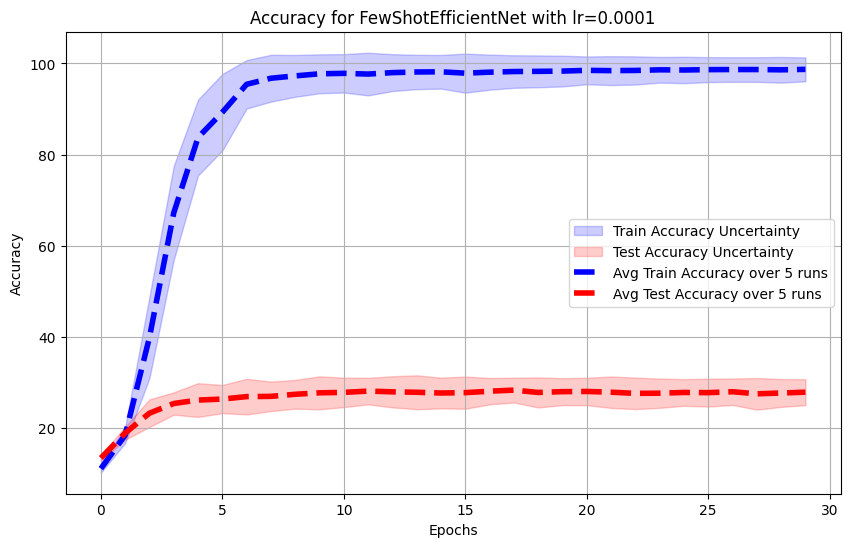

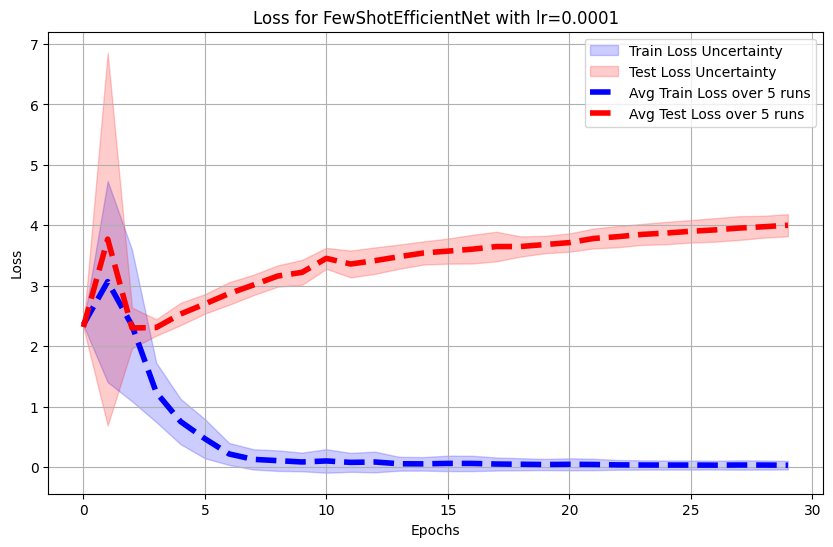

In [14]:
experiment_name = "FewShotEfficientNet with lr=0.0001"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")

In [15]:
metrics_list = []
for _ in range(5):
    model = FewShotEfficientNet()
    metrics, time = train_few_shot_efficientnet(model, train_dataloader, test_dataloader, epochs=30, lr=0.00001)
    metrics_list.append(metrics)

Train loss: 2.36268 | Train accuracy: 11.11%
Test loss: 2.38563 | Test accuracy: 11.11%

Train loss: 2.36820 | Train accuracy: 10.62%
Test loss: 2.36596 | Test accuracy: 10.62%

Train loss: 2.15326 | Train accuracy: 22.82%
Test loss: 2.36461 | Test accuracy: 11.31%

Train loss: 1.99389 | Train accuracy: 36.31%
Test loss: 2.36168 | Test accuracy: 11.90%

Train loss: 1.84095 | Train accuracy: 49.21%
Test loss: 2.36443 | Test accuracy: 12.70%

Train loss: 1.68013 | Train accuracy: 59.72%
Test loss: 2.36807 | Test accuracy: 12.30%

Train loss: 1.51638 | Train accuracy: 71.83%
Test loss: 2.37013 | Test accuracy: 13.49%

Train loss: 1.35337 | Train accuracy: 77.28%
Test loss: 2.37287 | Test accuracy: 14.09%

Train loss: 1.18346 | Train accuracy: 84.33%
Test loss: 2.38610 | Test accuracy: 12.90%

Train loss: 1.03156 | Train accuracy: 87.90%
Test loss: 2.39709 | Test accuracy: 14.48%

Train loss: 0.87682 | Train accuracy: 91.17%
Test loss: 2.40943 | Test accuracy: 14.58%

Train loss: 0.73684 |